In [3]:
import numpy as np
import pandas as pd
import seaborn as sns


In [4]:
import warnings

In [5]:
warnings.filterwarnings('ignore')
pd.set_option('max_column', None)
db = pd.read_csv('Week1_challenge_data_source(CSV).csv',na_values=['?', None])
db.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,42.0,5.0,23.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,NaN,NaN,NaN,NaN,NaN,NaN,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.0,5.0,16.0,26.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),NaN,NaN,NaN,NaN,NaN,NaN,971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),NaN,NaN,NaN,NaN,NaN,NaN,751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,NaN,NaN,44.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,3330.0,37882.0,1.321510e+09,undefined,undefined,NaN,NaN,NaN,NaN,NaN,NaN,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.089009e+09,Samsung,Samsung Sm-G390F,NaN,NaN,NaN,NaN,NaN,NaN,607.0,604.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [6]:
# column names
db.columns.tolist()

['Bearer Id',
 'Start',
 'Start ms',
 'End',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Socia

In [7]:
# number of data points
print(f" There are {db.shape[0]} rows and {db.shape[1]} columns")

 There are 150001 rows and 55 columns


In [8]:
# how many missing values exist or better still what is the % of missing values in the dataset?
def percent_missing(df):

    # Calculate total number of cells in dataframe
    totalCells = np.product(df.shape)

    # Count number of missing values per column
    missingCount = df.isnull().sum()

    # Calculate total number of missing values
    totalMissing = missingCount.sum()

    # Calculate percentage of missing values
    print("The telecom dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")
    
percent_missing(db)

The telecom dataset contains 12.5 % missing values.


In [9]:
# drop columns with more than 30% missing values
df_clean = db.dropna(thresh=db.shape[0]*0.7,how='all', axis=1)
df_clean.shape

(150001, 45)

<AxesSubplot:>

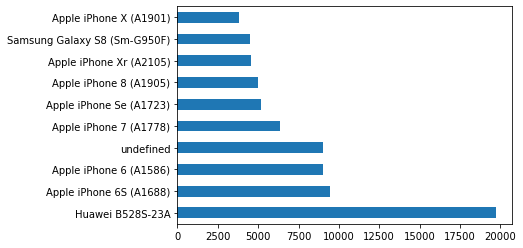

In [15]:
#
n = 10
df_clean['Handset Type'].value_counts()[:n]
df_clean['Handset Type'].value_counts()[:n].plot(kind='barh')

<AxesSubplot:>

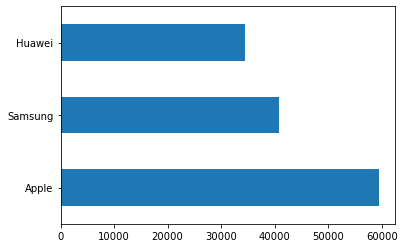

In [12]:
#
n = 3
df_clean['Handset Manufacturer'].value_counts()[:n]
df_clean['Handset Manufacturer'].value_counts()[:n].plot(kind='barh')

<AxesSubplot:>

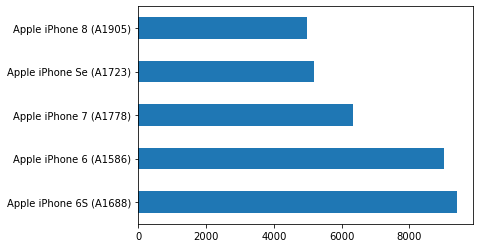

In [16]:
#  identify the top 5 handsets per top 3 handset manufacturer

def group_by_manufacturer(manufacturer):
    n = 5
    HandSet_manu_grp = df_clean.groupby(['Handset Manufacturer'])
    TOpFive = HandSet_manu_grp.get_group(manufacturer)['Handset Type'].value_counts()[:n]
    return TOpFive
group_by_manufacturer(manufacturer='Apple').plot(kind='barh')

<AxesSubplot:>

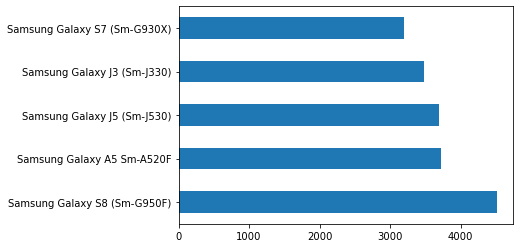

In [17]:
group_by_manufacturer(manufacturer='Samsung').plot(kind='barh')

<AxesSubplot:>

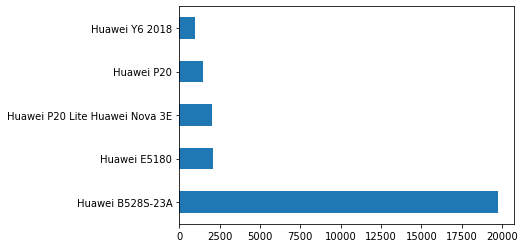

In [18]:
group_by_manufacturer(manufacturer='Huawei').plot(kind='barh')

In [19]:
def adding_columns(name,column1,column2):
    df_clean[name] = df_clean[column1] + df_clean[column2]
    return

adding_columns(name='Total_UL_DL',column1='Total UL (Bytes)',column2='Total DL (Bytes)')
adding_columns(name='Social Media_UL_DL',column1='Social Media DL (Bytes)',column2='Social Media UL (Bytes)')
adding_columns(name='Google_UL_DL',column1='Google DL (Bytes)',column2='Google UL (Bytes)')
adding_columns(name='Email_UL_DL',column1='Email DL (Bytes)',column2='Email DL (Bytes)')
adding_columns(name='Youtube_UL_DL',column1='Youtube DL (Bytes)',column2='Youtube DL (Bytes)')
adding_columns(name='Netflix_UL_DL',column1='Netflix DL (Bytes)',column2='Netflix UL (Bytes)')
adding_columns(name='Gaming_UL_DL',column1='Gaming DL (Bytes)',column2='Gaming UL (Bytes)')
adding_columns(name='Other_UL_DL',column1='Other DL (Bytes)',column2='Other UL (Bytes)')


In [20]:
df_clean.shape

(150001, 53)

In [21]:
user_grp = df_clean.groupby(['MSISDN/Number'])
user_grp['Bearer Id'].agg(['count'])

,count
MSISDN/Number,
3.360100e+10,1
3.360100e+10,1
3.360100e+10,1
3.360101e+10,1
3.360101e+10,2
...,...
3.379000e+10,1
3.379000e+10,1
3.197021e+12,1


In [22]:
df_agg = df_clean.groupby(
   'MSISDN/Number'
).agg(
    {
    
          'Dur. (ms)':sum,
          'Total_UL_DL':sum,
          'Social Media_UL_DL':sum,
          'Google_UL_DL':sum,
          'Email_UL_DL':sum,
          'Youtube_UL_DL':sum,
          'Netflix_UL_DL':sum,
          'Gaming_UL_DL':sum,
          'Other_UL_DL':sum,
        
    }
)

In [17]:
df_agg

,Dur. (ms),Total_UL_DL,Social Media_UL_DL,Google_UL_DL,Email_UL_DL,Youtube_UL_DL,Netflix_UL_DL,Gaming_UL_DL,Other_UL_DL
MSISDN/Number,,,,,,,,,
3.360100e+10,116720.0,8.786906e+08,2232135.0,4389005.0,1674800.0,29800402.0,27180981.0,8.124587e+08,386570872.0
3.360100e+10,181230.0,1.568596e+08,2660565.0,5334863.0,5657642.0,10648502.0,11221763.0,1.197501e+08,281710071.0
3.360100e+10,134969.0,5.959665e+08,3195623.0,3443126.0,4873000.0,4274544.0,19353900.0,5.388277e+08,501693672.0
3.360101e+10,49878.0,4.223207e+08,280294.0,9678493.0,4357236.0,8786246.0,1942092.0,3.911261e+08,35279702.0
3.360101e+10,37104.0,1.457411e+09,2912542.0,18499616.0,4495616.0,20679942.0,49201724.0,1.314798e+09,804804484.0
...,...,...,...,...,...,...,...,...,...
3.379000e+10,8810.0,7.146416e+08,300183.0,7531269.0,961892.0,16588620.0,14902538.0,6.603614e+08,295282817.0
3.379000e+10,140988.0,4.803073e+08,498569.0,5429705.0,5026866.0,11193724.0,8531060.0,4.370033e+08,211115113.0
3.197021e+12,877385.0,2.321240e+08,715224.0,10438660.0,1684558.0,19679778.0,26592300.0,1.780487e+08,470526473.0


In [23]:
df_clean.isnull().sum()


Bearer Id                           991
Start                                 1
Start ms                              1
End                                   1
End ms                                1
Dur. (ms)                             1
IMSI                                570
MSISDN/Number                      1066
IMEI                                572
Last Location Name                 1153
Avg RTT DL (ms)                   27829
Avg RTT UL (ms)                   27812
Avg Bearer TP DL (kbps)               1
Avg Bearer TP UL (kbps)               1
DL TP < 50 Kbps (%)                 754
50 Kbps < DL TP < 250 Kbps (%)      754
250 Kbps < DL TP < 1 Mbps (%)       754
DL TP > 1 Mbps (%)                  754
UL TP < 10 Kbps (%)                 792
10 Kbps < UL TP < 50 Kbps (%)       792
50 Kbps < UL TP < 300 Kbps (%)      792
UL TP > 300 Kbps (%)                792
Activity Duration DL (ms)             1
Activity Duration UL (ms)             1
Dur. (ms).1                           1


In [19]:
skewValue = df_clean.skew(axis=0)
skewValue

Bearer Id                           0.026666
Start ms                            0.000968
End ms                             -0.001163
Dur. (ms)                           3.952609
IMSI                               41.045956
MSISDN/Number                     332.155856
IMEI                                1.071470
Avg RTT DL (ms)                    62.907828
Avg RTT UL (ms)                    28.457415
Avg Bearer TP DL (kbps)             2.589437
Avg Bearer TP UL (kbps)             4.503413
DL TP < 50 Kbps (%)                -2.297803
50 Kbps < DL TP < 250 Kbps (%)      3.271453
250 Kbps < DL TP < 1 Mbps (%)       4.566158
DL TP > 1 Mbps (%)                  5.370351
UL TP < 10 Kbps (%)                -8.985016
10 Kbps < UL TP < 50 Kbps (%)      10.943888
50 Kbps < UL TP < 300 Kbps (%)     21.878495
UL TP > 300 Kbps (%)               36.174053
Activity Duration DL (ms)           5.872256
Activity Duration UL (ms)           7.382557
Dur. (ms).1                         3.952609
Nb of sec 

In [24]:
# fill missing with ffill method or bfill for column (Bearer Id) since it is a categorical feature

def fix_missing_ffill(df, col):
    df[col] = df[col].fillna(method='ffill')
    return df[col]


def fix_missing_bfill(df, col):
    df[col] = df[col].fillna(method='bfill')
    return df[col]
df_clean['Bearer Id'] = fix_missing_ffill(df_clean, 'Bearer Id')

# fill 'Dur. (ms)' column with mode since the skewness of the column is higher
def fix_missing_mode(df, col):
    df[col] = df[col].fillna(df[col].mode()[0])
    return df[col]

df_clean['Dur. (ms)'] = fix_missing_mode(df_clean, 'Dur. (ms)')

# fill missing value with mean for column that has no skew number
def fix_missing_mean(df, col):
    df[col] = df[col].fillna(df[col].mean())
    return df[col]

df_clean['Total_UL_DL'] = fix_missing_mode(df_clean, 'Total_UL_DL')
df_clean['Social Media_UL_DL'] = fix_missing_mode(df_clean, 'Social Media_UL_DL')
df_clean['Social Media_UL_DL'] = fix_missing_mode(df_clean, 'Social Media_UL_DL')



In [25]:
# which column(s) has missing values
df_clean.isnull().sum()

Bearer Id                             0
Start                                 1
Start ms                              1
End                                   1
End ms                                1
Dur. (ms)                             0
IMSI                                570
MSISDN/Number                      1066
IMEI                                572
Last Location Name                 1153
Avg RTT DL (ms)                   27829
Avg RTT UL (ms)                   27812
Avg Bearer TP DL (kbps)               1
Avg Bearer TP UL (kbps)               1
DL TP < 50 Kbps (%)                 754
50 Kbps < DL TP < 250 Kbps (%)      754
250 Kbps < DL TP < 1 Mbps (%)       754
DL TP > 1 Mbps (%)                  754
UL TP < 10 Kbps (%)                 792
10 Kbps < UL TP < 50 Kbps (%)       792
50 Kbps < UL TP < 300 Kbps (%)      792
UL TP > 300 Kbps (%)                792
Activity Duration DL (ms)             1
Activity Duration UL (ms)             1
Dur. (ms).1                           1


In [26]:
quantity = ['Dur. (ms)','Total_UL_DL','Social Media_UL_DL','Google_UL_DL','Email_UL_DL','Youtube_UL_DL','Netflix_UL_DL','Gaming_UL_DL','Other_UL_DL']

In [28]:
df_clean_quantity = df_clean[quantity]
df_clean_quantity.head()

,Dur. (ms),Total_UL_DL,Social Media_UL_DL,Google_UL_DL,Email_UL_DL,Youtube_UL_DL,Netflix_UL_DL,Gaming_UL_DL,Other_UL_DL
0,1823652.0,345629377.0,1570185.0,2905912.0,7127084.0,31709222.0,17855187.0,292426453.0,180558843.0
1,1365104.0,707185356.0,1933278.0,4414096.0,1258092.0,40494790.0,35565545.0,609920783.0,541959383.0
2,1361762.0,307690973.0,1726277.0,10229119.0,5380302.0,39451322.0,23751202.0,229980251.0,414908351.0
3,1321509.0,889352748.0,657493.0,11811761.0,2879508.0,42776244.0,15092588.0,810387875.0,761837216.0
4,1089009.0,607681403.0,912788.0,7748843.0,3872992.0,30518760.0,17539799.0,531237049.0,564619822.0


In [29]:
df_clean_quantity.describe()

,Dur. (ms),Total_UL_DL,Social Media_UL_DL,Google_UL_DL,Email_UL_DL,Youtube_UL_DL,Netflix_UL_DL,Gaming_UL_DL,Other_UL_DL
count,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05
mean,1.046084e+05,4.957622e+08,1.828250e+06,7.807295e+06,3.583458e+06,2.326815e+07,2.262861e+07,4.303331e+08,4.293653e+08
std,8.103736e+04,2.443828e+08,1.035646e+06,3.516420e+06,2.071679e+06,1.342114e+07,9.260820e+06,2.440199e+08,2.432681e+08
min,7.142000e+03,2.895611e+07,1.563000e+03,4.033000e+04,2.800000e+01,1.060000e+02,9.843200e+04,3.063580e+05,1.490450e+05
25%,5.744200e+04,2.844744e+08,9.322180e+05,4.943599e+06,1.785586e+06,1.166700e+07,1.597946e+07,2.187279e+08,2.185534e+08
50%,8.639900e+04,4.968610e+08,1.826471e+06,7.812835e+06,3.587010e+06,2.323204e+07,2.263554e+07,4.316150e+08,4.299865e+08
75%,1.324300e+05,7.065054e+08,2.727487e+06,1.068280e+07,5.378654e+06,3.489704e+07,2.929044e+07,6.414159e+08,6.399275e+08
max,1.859336e+06,9.559848e+08,3.650861e+06,1.552878e+07,7.172292e+06,4.651820e+07,4.519815e+07,8.592028e+08,8.595209e+08
